In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image
import os 

TARGET_SIZE = (512, 512)

In [6]:
# class look-up table 
classes = ['elbow positive', 'fingers positive', 'forearm fracture', 'humerus fracture', 'shoulder fracture', 'wrist positive']

In [19]:
curr = os.getcwd()
TRAIN = os.path.join(curr, 'data/train/images/')
TEST = os.path.join(curr, 'data/test/images/')
VAL = os.path.join(curr, 'data/valid/images/')
TR_LABEL = os.path.join(curr, 'data/train/labels/')
TS_LABEL = os.path.join(curr, 'data/test/labels/')

elbow positive


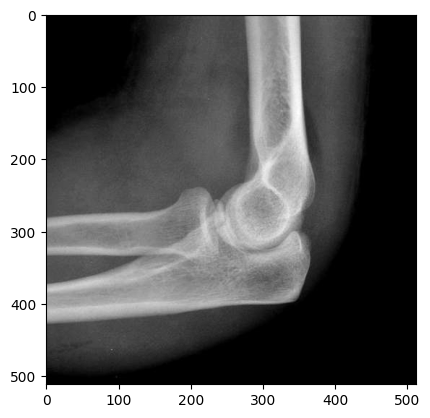

In [28]:
# display xray & class
for file in sorted(os.listdir(TRAIN)):
    image_path = os.path.join(TRAIN, file)
    image = Image.open(image_path)
    plt.imshow(image, cmap = 'gray')
    break
    
for file in sorted(os.listdir(TR_LABEL)):    
    label_path = os.path.join(TR_LABEL, file)
    with open(label_path, 'r') as label:
        _class = label.read()[0]
        print(classes[int(_class)])
    break

In [114]:
images = [x for x in sorted(os.listdir(TRAIN))][:20:2]
labels = [x for x in sorted(os.listdir(TR_LABEL))][:20:2]

In [29]:
# image properties
img_array = np.array(image)
print(f"Image Mode: {image.mode}")
print(f"Image Shape: {img_array.shape}")

Image Mode: L
Image Shape: (512, 512)


In [30]:
print(f" Train Samples: {len(os.listdir(TRAIN))}")
print(f" Test Samples: {len(os.listdir(TEST)) + len(os.listdir(VAL))}")

 Train Samples: 368
 Test Samples: 71


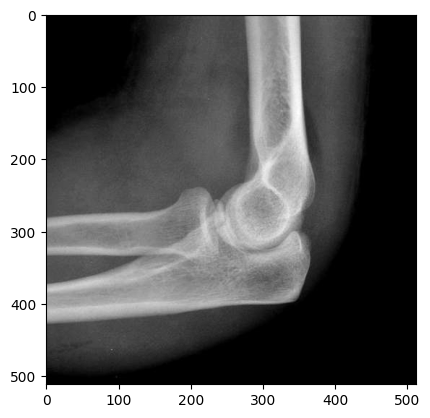

In [31]:
bw_img = image.convert('L')
plt.imshow(bw_img, cmap='gray')

In [32]:
bw_imgarr = np.array(bw_img)
bw_imgarr.shape

(512, 512)

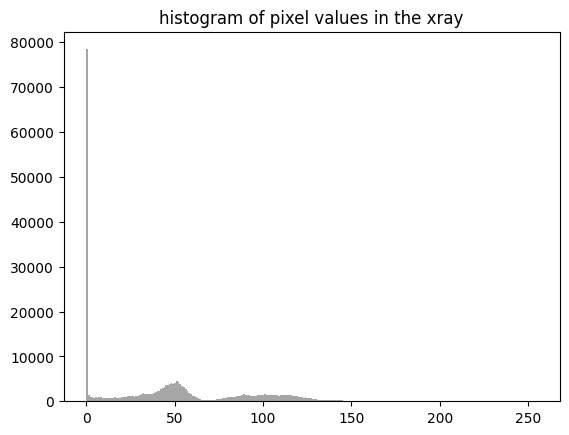

In [33]:
plt.hist(range(256), bins=256, weights=image.convert('L').histogram(), color='gray', alpha=0.7)
plt.title('histogram of pixel values in the xray')
plt.show()

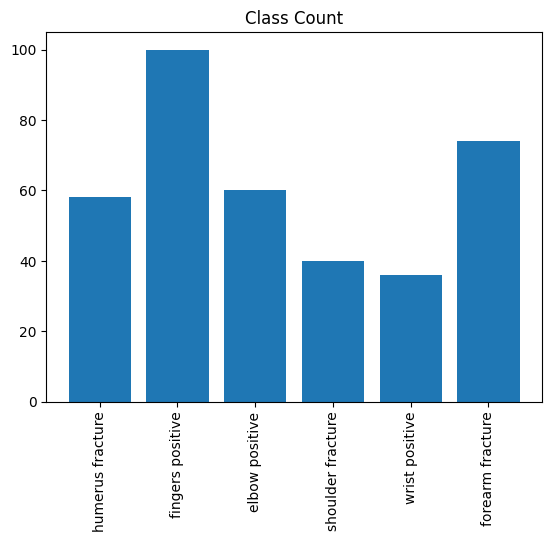

In [184]:
class_count = [classes[int(i)] for i in class_label]
class_set = set(class_count)
class_dict = {i : 0 for i in class_set}
for i in class_count:
    class_dict[i]+=1

plt.bar(class_dict.keys(), class_dict.values())
plt.xticks(rotation = 90)
plt.title('Class Count')
plt.show()

In [24]:
def RGB_to_L(path): # convert RGB images to grayscale 
    for file in sorted(os.listdir(path)):
        image_path = os.path.join(path, file)
        image = Image.open(image_path)
        image = image.convert('L')
        image.save(image_path, 'JPEG')
    print('grayscale conversion done...')

In [25]:
RGB_to_L(TRAIN)
RGB_to_L(TEST)
RGB_to_L(VAL)

grayscale conversion done...
grayscale conversion done...
grayscale conversion done...


In [135]:
images = [x for x in sorted(os.listdir(TRAIN))][:20:2]
labels = [x for x in sorted(os.listdir(TR_LABEL))][:20:2]
class_label = []
for label in labels:
    with open(os.path.join(TR_LABEL, label ), 'r') as label_file:
        class_label.append(label_file.read()[0])

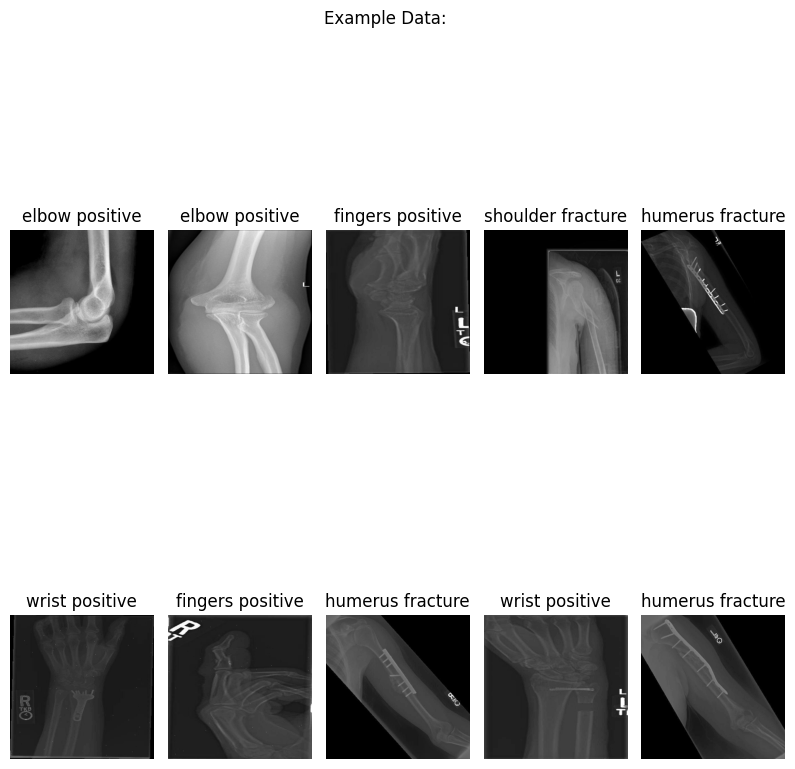

In [116]:
fig, ax = plt.subplots(2,5, figsize=(10,10))
ax = ax.flatten()
for i in range(0,10):
    image = Image.open(os.path.join(TRAIN, images[i]))
    ax[i].imshow(image, cmap = 'gray')
    ax[i].axis('off')
    ax[i].set_title(classes[int(class_label[i])])
plt.suptitle('Example Data:')
plt.subplots_adjust(hspace=0, wspace=0.1)
plt.show()
    

In [54]:

''' 
RESIZE, CONVERT TO GRAYSCALE AND ADJUST BBOX DIMENSIONS 

def process_image(IMG_PATH, LABEL_PATH):
    for image_file in sorted(os.listdir(IMG_PATH)):
        image_path = os.path.join(IMG_PATH, image_file)
        label_path = os.path.join(LABEL_PATH, os.path.splitext(image_file)[0] + ".txt")
        
        if os.path.exists(label_path):
            image = Image.open(image_path)
            image = image.convert('L')
            resized_image = image.resize(TARGET_SIZE)
            org_w, org_h = image.size
            
            with open(label_path, 'r') as label_file:
                lines = label_file.readlines()
                
            with open(label_path, 'w') as label_file:
                for line in lines:
                    label_data = list(map(float, line.strip().split()))
                    adjusted_data = [label_data[0]] + [val * TARGET_SIZE[i % 2] / org_w if i % 2 == 0 else val * TARGET_SIZE[i % 2] / org_h for i, val in enumerate(label_data[1:])]
                    label_file.write(" ".join(map(str, adjusted_data)) + "\n")
            resized_image.save(os.path.join(IMG_PATH, image_file), 'JPEG')
    print('image processing done...')
'''